In [2]:
# import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(" imported sucessfully")

 imported sucessfully


In [3]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import the clusterings 
from sklearn.cluster import KMeans
print(" imported")

 imported


In [6]:
# import the daaframes 
df=pd.read_csv("E:\\6th semmmm\\7th sems\\k means algorithms\\mall_customers.csv")
df.drop(columns='CustomerID',inplace=True)

In [8]:
print(" the shape of the data is ",df.shape)
df.head()

 the shape of the data is  (200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
# basic eda
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


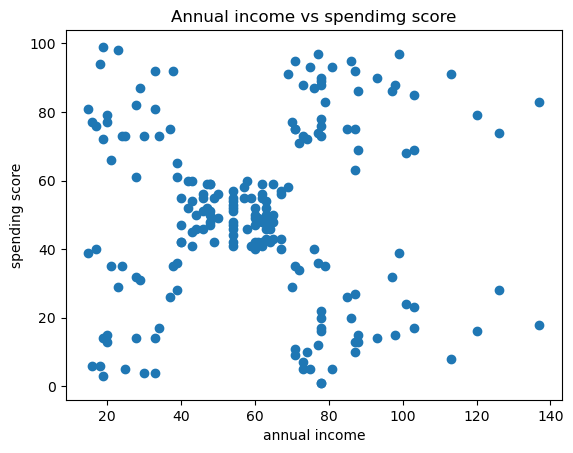

In [10]:
# show the relatiponship between the annual income vs spendingscore(1-100)
plt.title("Annual income vs spendimg score")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

# find the elbow

In [12]:
from sklearn.cluster import KMeans

k_range=range(2,10)
sse=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)
print(" append sucessfully")

 append sucessfully


In [13]:
sse

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37239.83554245604,
 30566.45113025186,
 25011.839349156588,
 21797.084944646376]

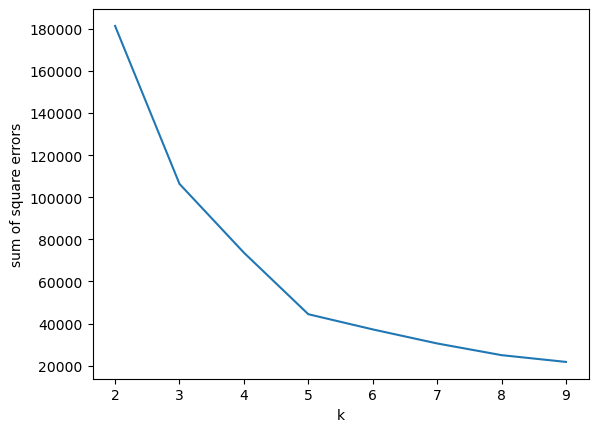

In [14]:
# plot the elbow
plt.xlabel('k')
plt.ylabel('sum of square errors')
plt.plot(k_range,sse)
plt.show()

# from the above graph we can make the 5 clusters 

In [16]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])


In [17]:
# the target clustering groups are 
y_predicted

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

# assign the cluster group into the dataframes 

In [18]:
df['cluster']=y_predicted
print(" sucessfully")

 sucessfully


In [19]:
df.sample(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
78,Female,23,54,52,0
171,Male,28,87,75,4


# visualize the data

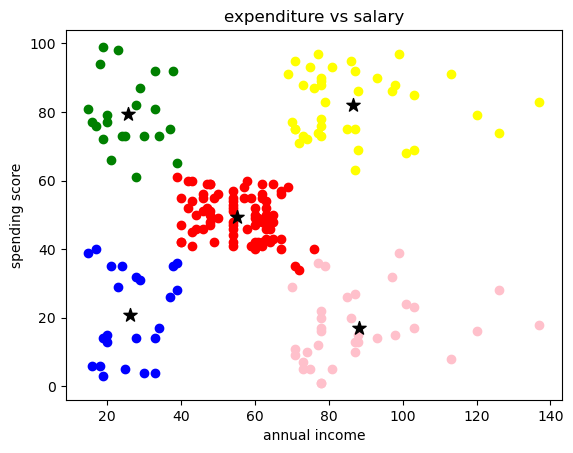

In [34]:
# y_predicted --> predict values


plt.xlabel("annual income")
plt.ylabel("spending score")
plt.title("expenditure vs salary")
plt.scatter(df[df['cluster']==0]['Annual Income (k$)'],df[df['cluster']==0]['Spending Score (1-100)'],color='red')
plt.scatter(df[df['cluster']==1]['Annual Income (k$)'],df[df['cluster']==1]['Spending Score (1-100)'],color='blue')
plt.scatter(df[df['cluster']==2]['Annual Income (k$)'],df[df['cluster']==2]['Spending Score (1-100)'],color='green')
plt.scatter(df[df['cluster']==3]['Annual Income (k$)'],df[df['cluster']==3]['Spending Score (1-100)'],color='pink')
plt.scatter(df[df['cluster']==4]['Annual Income (k$)'],df[df['cluster']==4]['Spending Score (1-100)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100)
plt.show()

In [27]:
# find the centroids
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

# age vs spending score

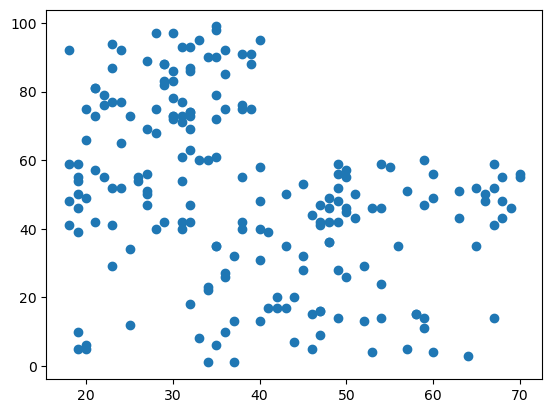

In [36]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])

In [37]:

k_range=range(2,10)
sse=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)
print(" append sucessfully")

 append sucessfully


# elbow : find out the number of clustering (k)

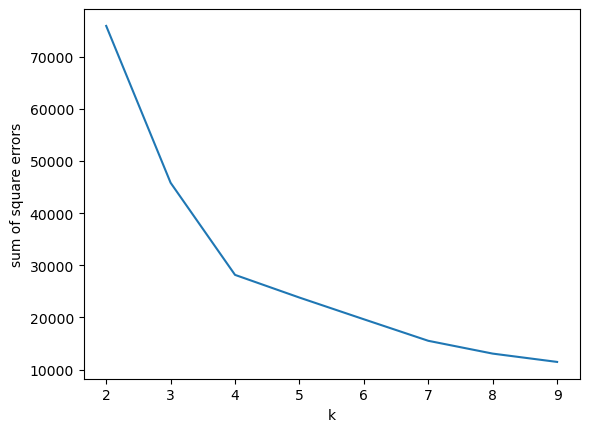

In [38]:
plt.xlabel('k')
plt.ylabel('sum of square errors')
plt.plot(k_range,sse)
plt.show()
# there is clearly 4 distinct grpoups

In [41]:
km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(df[['Age','Spending Score (1-100)']])
print(" predicted sucessfully")


 predicted sucessfully


In [42]:
y_predicted

array([1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 1, 3, 0, 1, 0,
       3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 2, 1,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [43]:
df['cluster_age']=y_predicted
print(" sucessfully")

 sucessfully


In [44]:
df.sample(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_age
1,Male,21,15,81,2,0
80,Male,57,54,51,0,2


# visualize the data

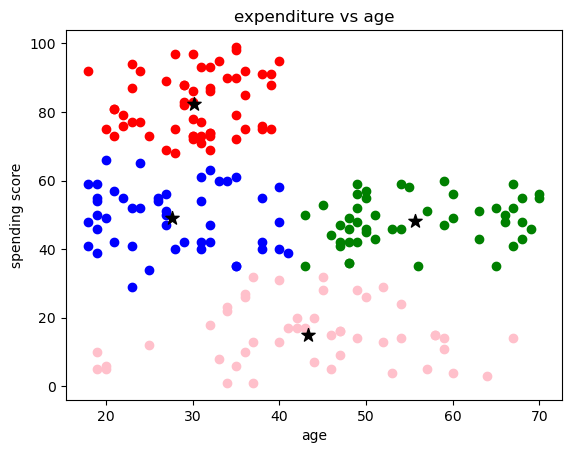

In [55]:
plt.xlabel("age")
plt.ylabel("spending score")
plt.title("expenditure vs age")
plt.scatter(df[df['cluster_age']==0]['Age'],df[df['cluster_age']==0]['Spending Score (1-100)'],color='red')
plt.scatter(df[df['cluster_age']==1]['Age'],df[df['cluster_age']==1]['Spending Score (1-100)'],color='blue')
plt.scatter(df[df['cluster_age']==2]['Age'],df[df['cluster_age']==2]['Spending Score (1-100)'],color='green')
plt.scatter(df[df['cluster_age']==3]['Age'],df[df['cluster_age']==3]['Spending Score (1-100)'],color='pink')
#plt.scatter(df[df['cluster']==4]['Annual Income (k$)'],df[df['cluster']==4]['Spending Score (1-100)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100)
plt.show()